# Machine Learning - Validation tools

+ Train Test Split
+ Cross Validation
+ Validation curve
+ GridSearch CV
+ Confusion Matrix
+ Learning Curve

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

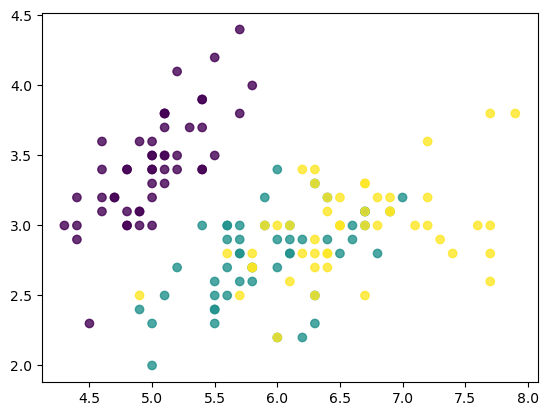

In [3]:
X = iris.data
y = iris.target

plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)

Train set: (120, 4)
Test set: (30, 4)


Text(0.5, 1.0, 'Test set')

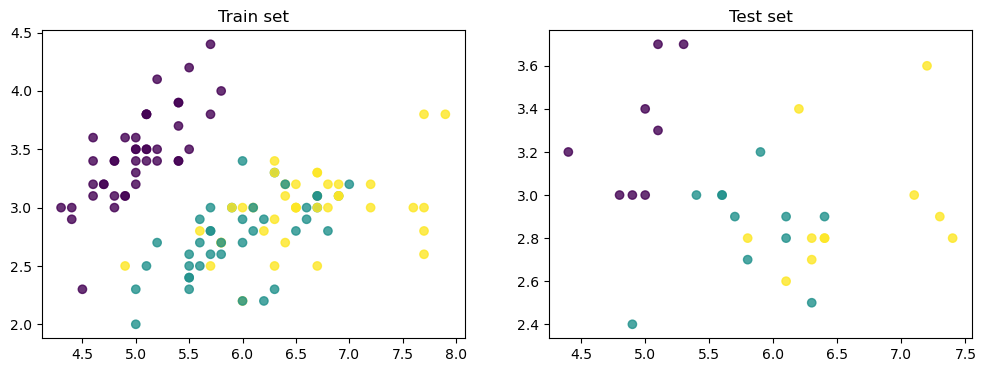

In [4]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
 
print('Train set:', X_train.shape)
print('Test set:', X_test.shape)
 


plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha=0.8)
plt.title('Train set')
plt.subplot(122)
plt.scatter(X_test[:, 0], X_test[:, 1],c=y_test, alpha=0.8)
plt.title('Test set')

In [5]:
from sklearn.neighbors import KNeighborsClassifier

In [6]:
model = KNeighborsClassifier(n_neighbors=1)
 
model.fit(X_train, y_train)
 
print('train score:', model.score(X_train, y_train))
print('test score:', model.score(X_test, y_test))

train score: 1.0
test score: 0.9


# 2. Validation Set et Cross Validation

In [7]:
from sklearn.model_selection import cross_val_score

In [8]:
# Instantiation du modèle
model = KNeighborsClassifier() # Par défaut: n_neighbors=5
cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

array([1.        , 1.        , 1.        , 0.95833333, 0.95833333])

5 valeurs car n_neighbors = 5 par défaut

In [9]:
for i in range(1,50):
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [10]:
val_score = []
for k in range(1, 50):
    score = cross_val_score(KNeighborsClassifier(k), X_train, y_train, cv=5).mean()
    val_score.append(score)

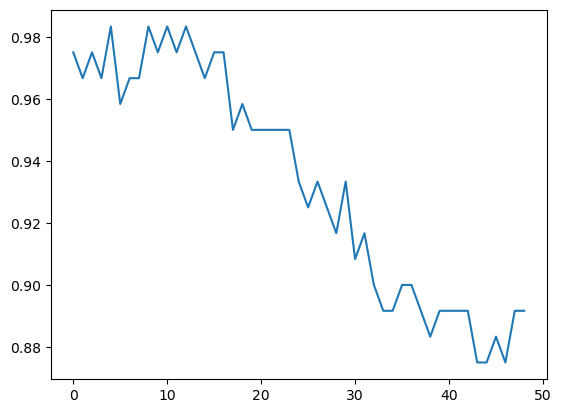

In [11]:
plt.plot(val_score)

Selon le graph, entre 3 et 5 voisins on est bon (haut en score et validation proche l'entrainement)

# 3. Validation Curve

In [12]:
from sklearn.model_selection import validation_curve

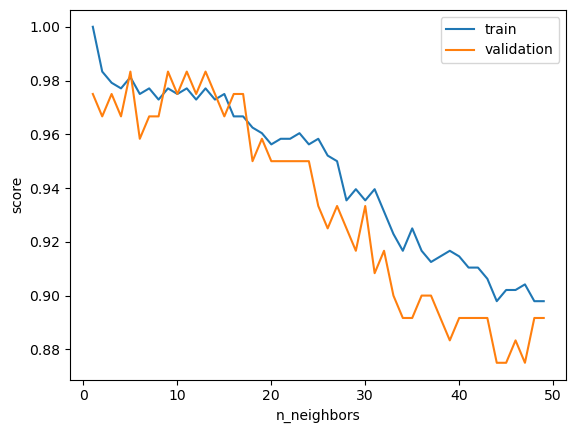

In [13]:
model = KNeighborsClassifier()
k = np.arange(1, 50)
 
train_score, val_score = validation_curve(model, X_train, y_train,param_name=
'n_neighbors', param_range=k, cv=5, scoring='accuracy')
 
plt.plot(k, train_score.mean(axis=1), label='train')
plt.plot(k, val_score.mean(axis=1), label='validation')
 
plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()

In [14]:
from sklearn.model_selection import learning_curve

In [15]:
# train_sizes => quantite de donnees a entrer par petite quantite
N, train_score, val_score = learning_curve(model, X_train, y_train, train_sizes= np.linspace(0.2, 1.0, num=5), cv = 5 )
# 0.2 départ
# 1.0 arrivée
#num=5 pour 5 colonnes, les découpes sur lesquelles l'entrainement va se faire

Traçage de learning curve

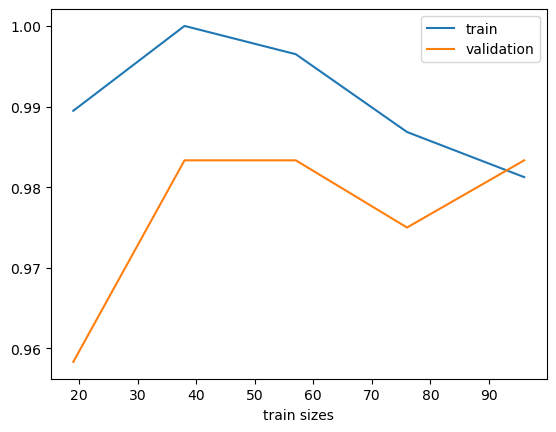

In [16]:
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train sizes')
plt.legend()

Du dataset complet on commence avec 20% du dataset puis 40% puis 60, 80 et 100%
Ici on voit qu'on arrive à une validation proche de l'entrainement vers 93%
Le but est de savoir si on a besoin de plus de données ou non.

# 4. GridSearchCV 

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
param_grid = {'n_neighbors': np.arange(1, 20),
              'metric': ['euclidean', 'manhattan']}
 
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
 
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [19]:
print(grid.best_score_)
print(grid.best_params_)

0.9833333333333334
{'metric': 'euclidean', 'n_neighbors': 5}


In [20]:
param_grid = {'n_neighbors': np.arange(1, 20),
              'metric': ['euclidean', 'manhattan'],
              'leaf_size': np.arange(1,80)}
 
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
 
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]),
                         'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [21]:
print(grid.best_score_)
print(grid.best_params_)

0.9833333333333334
{'leaf_size': 1, 'metric': 'euclidean', 'n_neighbors': 5}


La grille ne nous donnes pas l'info si on overfit ou non

In [22]:
model = grid.best_estimator_
model.score(X_test, y_test)

0.9333333333333333

On reprend les données du best score:

In [23]:
model_KNN_best = KNeighborsClassifier(leaf_size=1, metric='euclidean', n_neighbors=5)

In [24]:
model_KNN_best.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=1, metric='euclidean')

In [25]:
import joblib

In [26]:
joblib.dump(model_KNN_best, "best_model.pkl")

['best_model.pkl']